<a href="https://colab.research.google.com/github/ancestor9/24_fall_python-programimming-2/blob/main/1129_fastapi_iris_server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[AI를 활용한 데이터과학](https://github.com/ancestor9/AI-with-python)**
### **[pdf](https://github.com/ancestor9/AI-with-python/blob/main/AI%EB%A5%BC%20%ED%99%9C%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EA%B3%BC%ED%95%99%20%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%95.pdf)**
- https://www.autodraw.com/

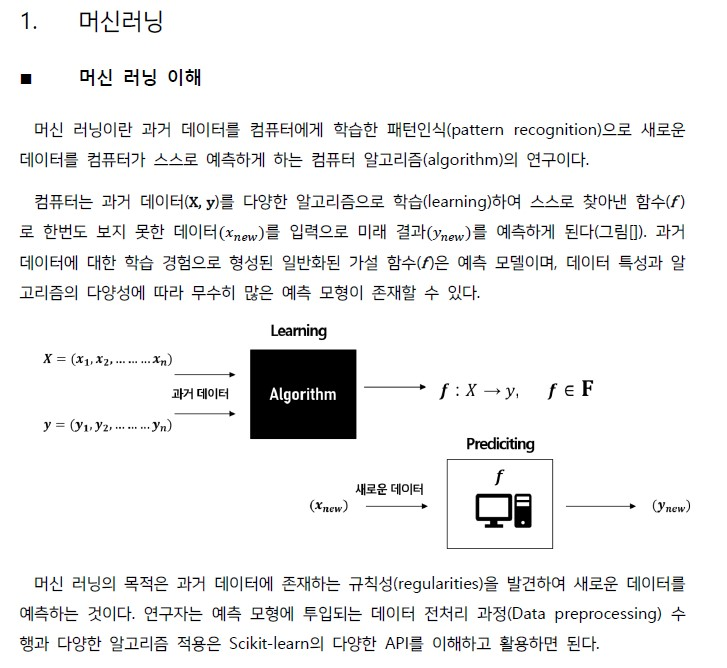

In [1]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename='/content/01_머신러닝.jpg')
display(image1)

In [2]:
# 1. 필요한 라이브러리 설치 및 임포트
!pip install fastapi uvicorn pyngrok nest-asyncio --quiet

# 런타임을 다시 시작한 후 아래의 코드를 실행해 주세요.
import pandas as pd
from fastapi import FastAPI
from pyngrok import ngrok, conf
import nest_asyncio
import uvicorn               # Web Server

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.7 MB/s eta 0:00:00


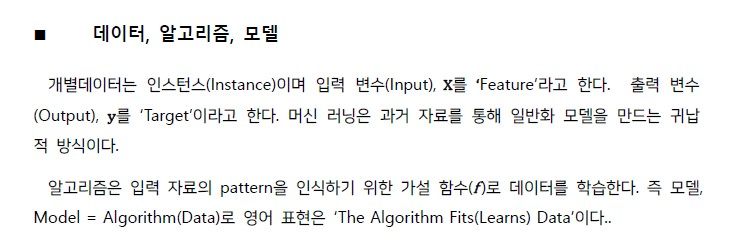

In [3]:
display(Image(filename='/content/02_모델.jpg'))

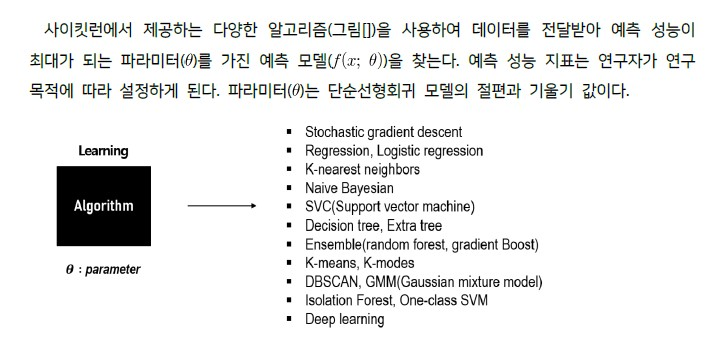

In [5]:
display(Image(filename='/content/03_알고리즘.jpg'))

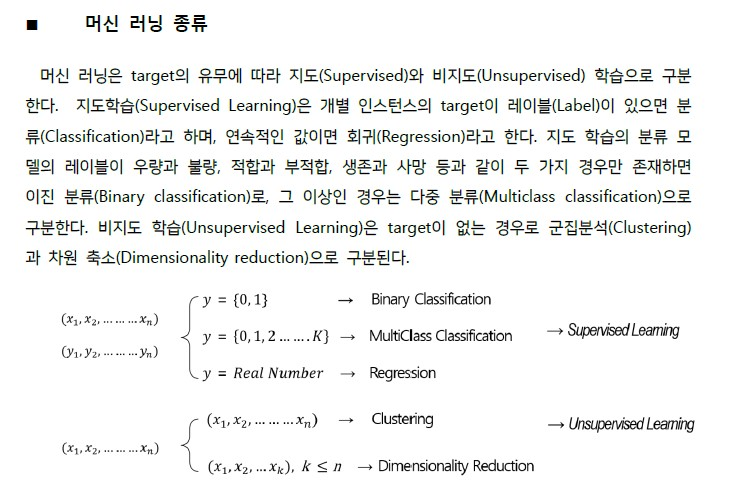

In [6]:
display(Image(filename='/content/04_머신러닝종류.jpg'))

## **분류(Classification)**

In [4]:
# prompt: iris 데이터를 학습해서 iris_model.pkl로 저장해줘

import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 2. Iris 데이터 로드 및 전처리
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X = iris_df.drop('target', axis=1)           # 데이터
y = iris_df['target']                        # 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 학습 (RandomForestClassifier 사용)
model = RandomForestClassifier()   # 알고리즘
model.fit(X_train, y_train)        # 모델, 모델 = 알고리즘(훈련데이터)

# 4. 모델 저장
filename = 'iris_model.pkl'        # 학습하는데 자원이 필요함
joblib.dump(model, filename)

print(f"Model saved to {filename}")

Model saved to iris_model.pkl


In [7]:
# server.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np
import uvicorn
from pyngrok import ngrok
import nest_asyncio # Import nest_asyncio

# 모델 로드
model = joblib.load("iris_model.pkl")

# FastAPI 애플리케이션 생성
app = FastAPI()

# 요청 Body를 위한 모델 정의
class IrisRequest(BaseModel):
    sepal_length: float
    sepal_width: float
    petal_length: float
    petal_width: float

# 예측 경로 정의
@app.post("/predict")
async def predict_iris(data: IrisRequest):
    # 입력 데이터를 배열로 변환
    input_data = np.array([[data.sepal_length, data.sepal_width, data.petal_length, data.petal_width]])
    # 예측 수행
    prediction = model.predict(input_data)
    # 예측 결과 반환
    return {"prediction": int(prediction[0])}

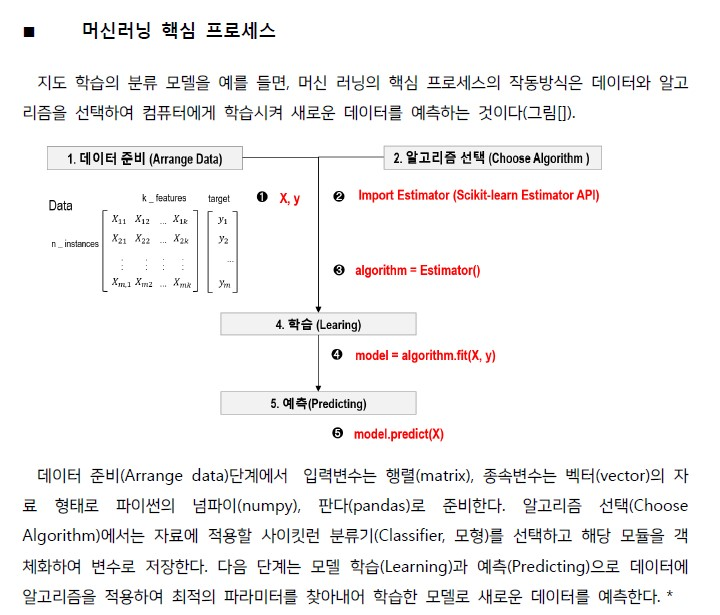

In [8]:
display(Image(filename='/content/05_예측모형작동구조.jpg'))

In [9]:
from google.colab import userdata
YOUR_AUTHTOKEN = userdata.get('ngrok')

# 6-1. ngrok의 모든 기존 터널 종료
ngrok.kill()

# 6-2. ngrok 인증 설정
conf.get_default().auth_token = YOUR_AUTHTOKEN  # YOUR_AUTHTOKEN을 실제 ngrok 토큰으로 변경하세요

# 6-3. ngrok을 이용한 외부 URL 생성
public_url = ngrok.connect(8000, bind_tls=True)  # bind_tls=True for HTTPS
print(f"FastAPI 앱에 접근 가능한 주소: {public_url}")

# 7. FastAPI 앱 실행 - Uvicorn 설정
nest_asyncio.apply()
uvicorn.run(app, host='0.0.0.0', port=8000)

INFO:     Started server process [441]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


FastAPI 앱에 접근 가능한 주소: NgrokTunnel: "https://6b66-34-168-140-83.ngrok-free.app" -> "http://localhost:8000"


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [441]
